In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [2]:
subway=pd.read_csv('../csv-data/2020_seoul_subway.csv', encoding='euc-kr')
subway

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,...,2972,3194,3342,3002,2857,2311,2523,1830,987,25
1,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,...,2286,2354,2261,1922,1696,1620,1181,768,426,77
2,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,...,873,1019,1234,1383,1271,1061,991,572,217,2
3,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,...,885,783,849,602,435,293,273,174,149,26
4,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,...,1636,1748,1890,1879,1827,1955,1800,1259,406,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202275,2020-12-31,8호선,2825,신흥,하차,31,95,78,211,145,...,341,341,381,428,292,229,219,85,42,0
202276,2020-12-31,8호선,2826,수진,승차,112,203,475,641,311,...,210,236,226,223,121,90,109,35,19,0
202277,2020-12-31,8호선,2826,수진,하차,15,70,92,227,190,...,296,309,300,372,296,232,202,127,45,0
202278,2020-12-31,8호선,2827,모란,승차,49,88,246,314,176,...,282,234,261,282,140,86,112,45,6,0


### 호선, 시간대별 그래프 나타내기


In [3]:
#호선을 기준으로 groupby 하고 그래프를 치환해준다. 
df1= subway.groupby(subway['호선']).mean()
set1=set(subway['호선'].values)
df1=df1.T
df1

호선,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선
역번호,154.500000,225.500000,325.598292,421.500000,2536.443654,2629.862469,2736.000000,2819.000000
06:00 이전,156.219809,189.947158,82.781655,138.075715,83.841345,76.829444,128.275608,98.729589
06:00 ~ 07:00,337.077322,480.651749,296.327681,395.578920,254.691545,186.146815,311.048859,245.123835
07:00 ~ 08:00,831.732923,1205.539973,738.464362,941.452711,688.271980,467.305592,765.703739,597.351093
08:00 ~ 09:00,1783.027596,2351.168852,1248.126047,1504.064786,1121.668063,753.787575,1264.093700,1038.150755
09:00 ~ 10:00,1242.340984,1614.549454,851.998686,988.875105,570.690966,435.769558,767.961266,588.667470
10:00 ~ 11:00,897.761612,919.239180,567.004968,689.570250,356.568232,288.416006,444.357040,356.821520
11:00 ~ 12:00,976.050683,841.408798,526.861430,655.236917,344.907311,276.031777,398.141889,338.925988
12:00 ~ 13:00,1041.308333,899.381585,552.981606,693.137453,368.372285,300.143696,423.470294,360.250482
13:00 ~ 14:00,1122.335383,1002.379918,597.541058,743.466845,397.532732,319.878358,450.424140,385.202266


In [4]:
df1.reset_index(inplace=True)
df1[:3]

호선,index,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선
0,역번호,154.500000,225.500000,325.598292,421.500000,2536.443654,2629.862469,2736.000000,2819.000000
1,06:00 이전,156.219809,189.947158,82.781655,138.075715,83.841345,76.829444,128.275608,98.729589
2,06:00 ~ 07:00,337.077322,480.651749,296.327681,395.578920,254.691545,186.146815,311.048859,245.123835


In [5]:
df1.set_index('index', inplace=True)
df1[:3]

호선,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선
index,,,,,,,,
역번호,154.500000,225.500000,325.598292,421.500000,2536.443654,2629.862469,2736.000000,2819.000000
06:00 이전,156.219809,189.947158,82.781655,138.075715,83.841345,76.829444,128.275608,98.729589
06:00 ~ 07:00,337.077322,480.651749,296.327681,395.578920,254.691545,186.146815,311.048859,245.123835


In [6]:
#'역번호' 칼럼 불필요하므로  삭제
df1.drop(index=['역번호'], inplace=True)
df1[:3]

호선,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선
index,,,,,,,,
06:00 이전,156.219809,189.947158,82.781655,138.075715,83.841345,76.829444,128.275608,98.729589
06:00 ~ 07:00,337.077322,480.651749,296.327681,395.578920,254.691545,186.146815,311.048859,245.123835
07:00 ~ 08:00,831.732923,1205.539973,738.464362,941.452711,688.271980,467.305592,765.703739,597.351093


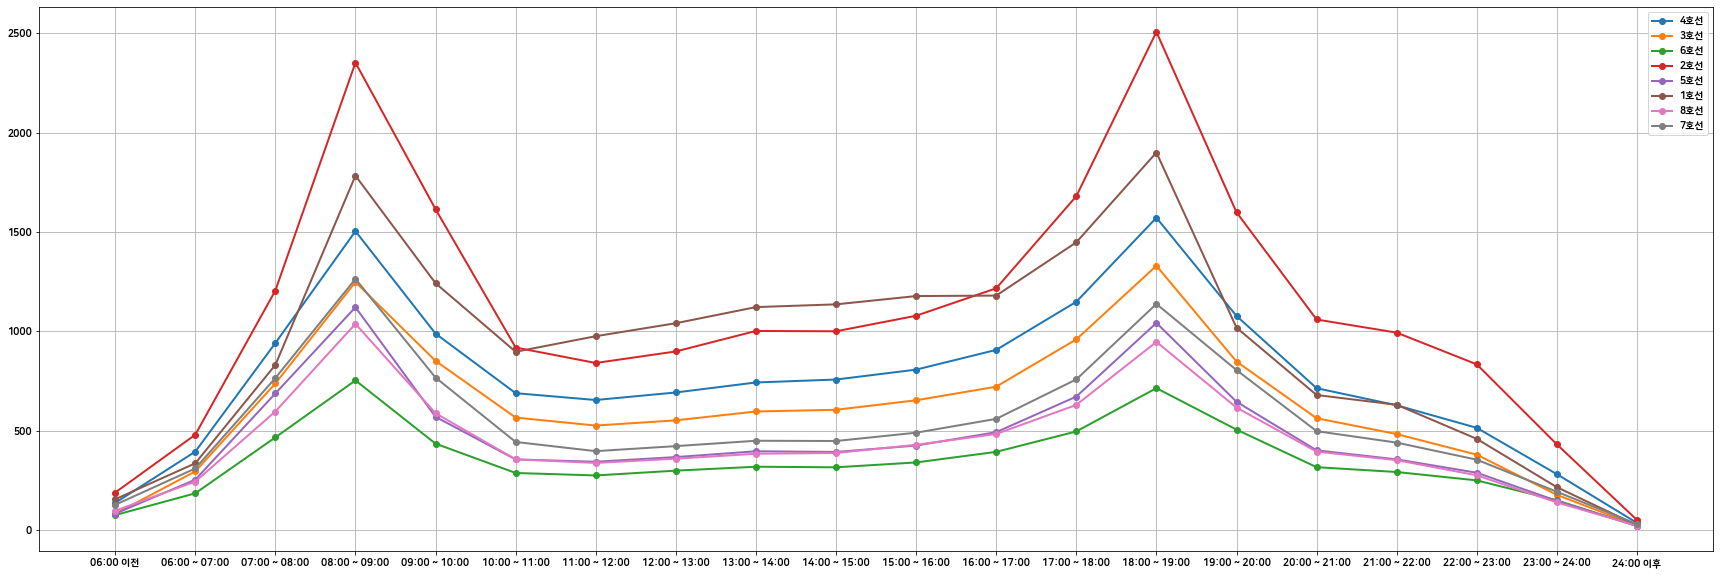

In [7]:
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

#호선 별, 시간대마다 이용 자 수 점이랑 직선 연결된 그래프

set1=set(subway['호선'].values)
for i in set1:
    plt.plot(df1.index, df1[i], marker='o', label=i)

plt.legend()

### 호선별 승하차 평균을 구함

In [54]:
#호선별 승하차 평균 그래프
subway1=subway.copy()
subway1.drop(columns=['역번호'], inplace=True)
subway1['총 합계'] = subway1.sum(axis=1)#하루에 지하철을 타는 평균인원을 구함...
subway1

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후,총 합계
0,2020-01-01,1호선,서울역,승차,356,280,313,774,923,1418,...,3194,3342,3002,2857,2311,2523,1830,987,25,36641
1,2020-01-01,1호선,서울역,하차,235,952,828,1043,1694,1655,...,2354,2261,1922,1696,1620,1181,768,426,77,30085
2,2020-01-01,1호선,시청,승차,105,118,123,206,318,309,...,1019,1234,1383,1271,1061,991,572,217,2,12212
3,2020-01-01,1호선,시청,하차,81,223,334,570,611,612,...,783,849,602,435,293,273,174,149,26,10608
4,2020-01-01,1호선,종각,승차,798,366,198,236,310,379,...,1748,1890,1879,1827,1955,1800,1259,406,6,20523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202275,2020-12-31,8호선,신흥,하차,31,95,78,211,145,165,...,341,381,428,292,229,219,85,42,0,3920
202276,2020-12-31,8호선,수진,승차,112,203,475,641,311,196,...,236,226,223,121,90,109,35,19,0,4053
202277,2020-12-31,8호선,수진,하차,15,70,92,227,190,166,...,309,300,372,296,232,202,127,45,0,3754
202278,2020-12-31,8호선,모란,승차,49,88,246,314,176,147,...,234,261,282,140,86,112,45,6,0,3223


In [55]:
df2=subway1.groupby(['호선', '구분']).sum() 
li=df2.columns.values
ll=list(li)
ll
del ll[20]
ll
df2=df2.drop(columns=ll)


In [56]:
df2

총 합계
호선  구분           
1호선 승차   67376106
    하차   66302931
2호선 승차  399022300
    하차  404640390
3호선 승차  148688146
    하차  148781726
4호선 승차  144079270
    하차  145202262
5호선 승차  173130667
    하차  171446944
6호선 승차   94971547
    하차   93345894
7호선 승차  200777294
    하차  197800651
8호선 승차   54039334
    하차   54184287

In [57]:
df3=df2.astype({'총 합계':int})
df3

총 합계
호선  구분           
1호선 승차   67376106
    하차   66302931
2호선 승차  399022300
    하차  404640390
3호선 승차  148688146
    하차  148781726
4호선 승차  144079270
    하차  145202262
5호선 승차  173130667
    하차  171446944
6호선 승차   94971547
    하차   93345894
7호선 승차  200777294
    하차  197800651
8호선 승차   54039334
    하차   54184287

In [58]:
set1=set(subway['호선'].values)
set_1=list(set1)
ride=[]
quit=[]
for i in set_1:
    ride.append(df3.loc[i,'승차'])
    quit.append(df3.loc[i,'하차']) 


#ride, quit의 요소가 Series라서 그래프를 그릴수없음. int로 변환해주어야 한다.#
    
ride_list = [int(i) for i in ride]
quit_list = [int(i) for i in quit]

print(ride_list)
type(ride_list[1])

[144079270, 148688146, 94971547, 399022300, 173130667, 67376106, 54039334, 200777294]


int

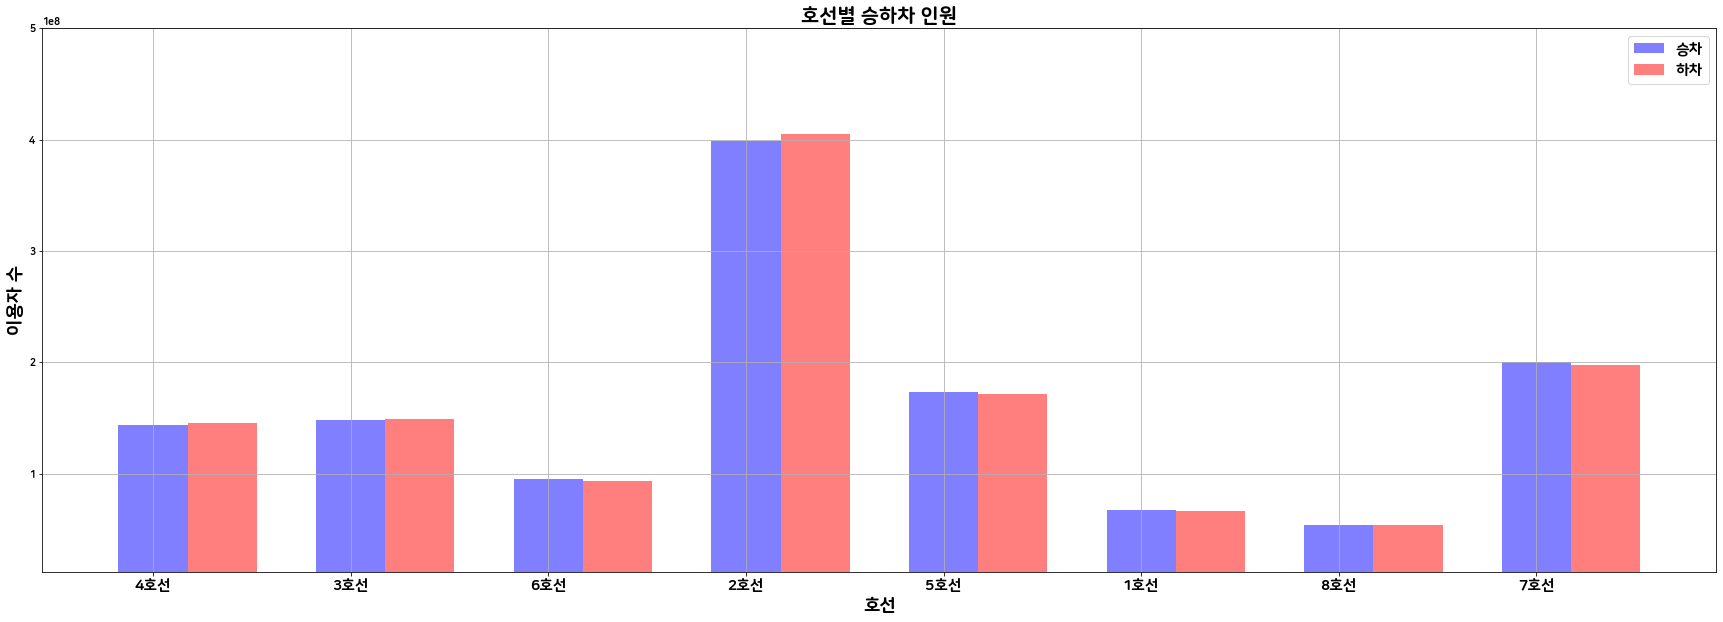

In [59]:
plt.rcParams["figure.figsize"] = (30,10)
bar_width = 0.35
alpha = 0.5
# . astype (int)

N = len(set_1)
index = np.arange(N)

p1 = plt.bar(index, ride_list, 

                 bar_width, 

                 color='b', 

                 alpha=alpha,

                 label='승차')

p2 = plt.bar(index + bar_width, quit_list, 

                 bar_width, 

                 color='r', 

                 alpha=alpha,

                 label='하차')


plt.ylim([12000000, 500000000])  
plt.title('호선별 승하차 인원', fontsize=20)

plt.ylabel('이용자 수', fontsize=18)

plt.xlabel('호선', fontsize=18)

plt.xticks(index, set_1, fontsize=15)

plt.legend((p1[0], p2[0]), ('승차', '하차'), fontsize=15)

plt.show()



### 분기별 지하철 이용자수 구하기 

In [19]:
#분기별 이용자수 x축 : 분기 y축: 이용자수 1~9호선 각 호선별 표시
subway2=subway.copy()
subway2.drop(columns=['역번호'], inplace=True)
subway2['하루평균'] = subway1.mean(axis=1)
subway2

subway2.loc[:50156,'분기']=1
subway2.loc[50156:100291,'분기']=2
subway2.loc[100291:151230,'분기']=3
subway2.loc[151230:,'분기']=4
subway2

,날짜,호선,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,...,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후,하루평균,분기
0,2020-01-01,1호선,서울역,승차,356,280,313,774,923,1418,...,3342,3002,2857,2311,2523,1830,987,25,1832.05,1.0
1,2020-01-01,1호선,서울역,하차,235,952,828,1043,1694,1655,...,2261,1922,1696,1620,1181,768,426,77,1504.25,1.0
2,2020-01-01,1호선,시청,승차,105,118,123,206,318,309,...,1234,1383,1271,1061,991,572,217,2,610.60,1.0
3,2020-01-01,1호선,시청,하차,81,223,334,570,611,612,...,849,602,435,293,273,174,149,26,530.40,1.0
4,2020-01-01,1호선,종각,승차,798,366,198,236,310,379,...,1890,1879,1827,1955,1800,1259,406,6,1026.15,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202275,2020-12-31,8호선,신흥,하차,31,95,78,211,145,165,...,381,428,292,229,219,85,42,0,196.00,4.0
202276,2020-12-31,8호선,수진,승차,112,203,475,641,311,196,...,226,223,121,90,109,35,19,0,202.65,4.0
202277,2020-12-31,8호선,수진,하차,15,70,92,227,190,166,...,300,372,296,232,202,127,45,0,187.70,4.0
202278,2020-12-31,8호선,모란,승차,49,88,246,314,176,147,...,261,282,140,86,112,45,6,0,161.15,4.0


In [21]:
df3=subway2.groupby(['분기','호선']).sum() 
df3=df3.drop(columns=ll)
df3

하루평균
분기  호선              
1.0 1호선   1828921.40
    2호선  10867742.25
    3호선   3924734.50
    4호선   3922881.55
    5호선   4432116.20
    6호선   2498239.90
    7호선   5137820.15
    8호선   1402126.65
2.0 1호선   1661376.40
    2호선   9925898.10
    3호선   3678076.75
    4호선   3588494.00
    5호선   4265247.40
    6호선   2329255.95
    7호선   4967226.20
    8호선   1340844.30
3.0 1호선   1614312.50
    2호선   9815055.60
    3호선   3653619.10
    4호선   3488272.45
    5호선   4249947.20
    6호선   2300015.45
    7호선   4914693.75
    8호선   1326475.25
4.0 1호선   1579341.55
    2호선   9574438.55
    3호선   3617063.25
    4호선   3464428.60
    5호선   4281569.75
    6호선   2288360.75
    7호선   4909157.15
    8호선   1341734.85

In [22]:
df3.loc[1,'1호선']

하루평균    1828921.4
Name: (1.0, 1호선), dtype: float64

[하루평균    1828921.4
Name: (1.0, 1호선), dtype: float64, 하루평균    1661376.4
Name: (2.0, 1호선), dtype: float64, 하루평균    1614312.5
Name: (3.0, 1호선), dtype: float64, 하루평균    1579341.55
Name: (4.0, 1호선), dtype: float64]


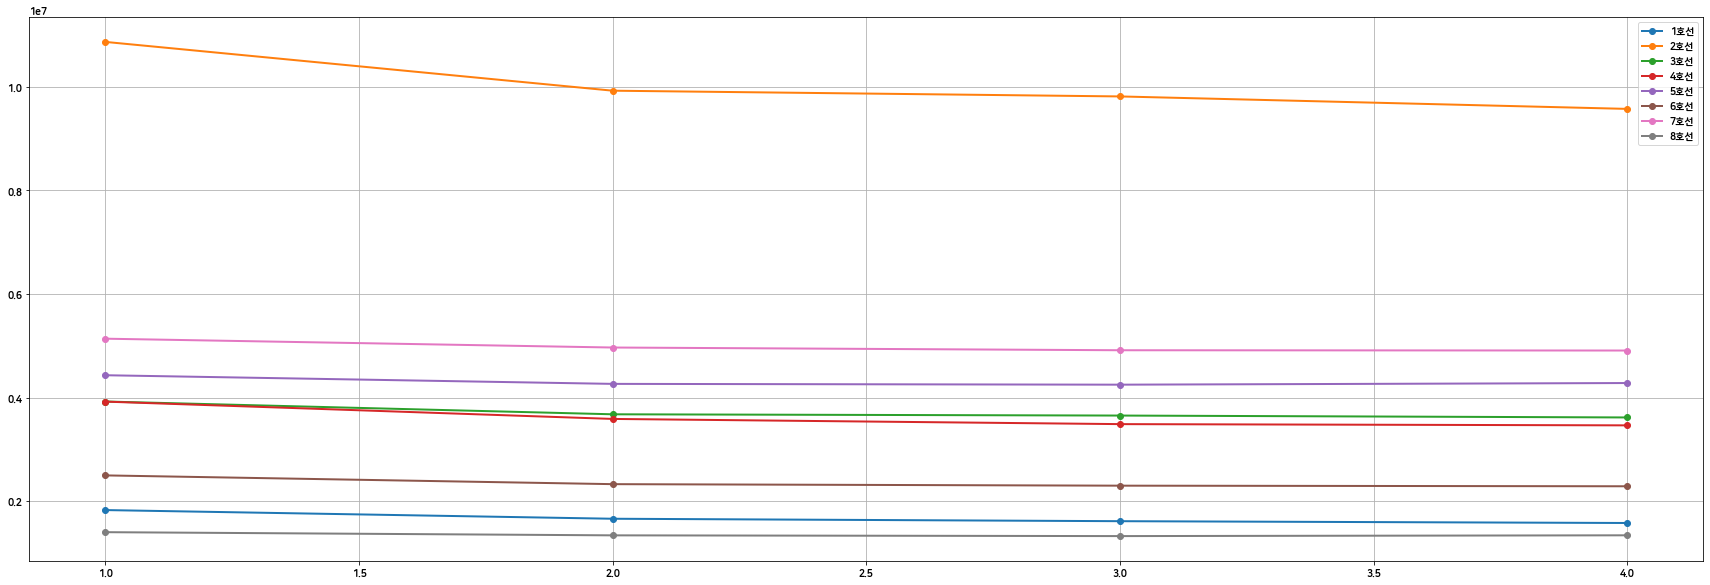

In [24]:
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

#호선 별, 시간대마다 이용 자 수 점이랑 직선 연결된 그래프

list1=[df3.loc[i, '1호선'] for i in range(1,5,1)]
list2=[df3.loc[i, '2호선'] for i in range(1,5,1)]
list3=[df3.loc[i, '3호선'] for i in range(1,5,1)]
list4=[df3.loc[i, '4호선'] for i in range(1,5,1)]
list5=[df3.loc[i, '5호선'] for i in range(1,5,1)]
list6=[df3.loc[i, '6호선'] for i in range(1,5,1)]
list7=[df3.loc[i, '7호선'] for i in range(1,5,1)]
list8=[df3.loc[i, '8호선'] for i in range(1,5,1)]

# for i in set_1:
#     list1.append(df3.loc[i,1])
#     list1.append(df3.loc[i,2]) 
#     list1.append(df3.loc[i,3])
#     list1.append(df3.loc[i,4]) 

print(list1)
plt.plot(range(1,5), list1, marker='o', label='1호선')
plt.plot(range(1,5), list2, marker='o', label='2호선')
plt.plot(range(1,5), list3, marker='o', label='3호선')
plt.plot(range(1,5), list4, marker='o', label='4호선')
plt.plot(range(1,5), list5, marker='o', label='5호선')
plt.plot(range(1,5), list6, marker='o', label='6호선')
plt.plot(range(1,5), list7, marker='o', label='7호선')
plt.plot(range(1,5), list8, marker='o', label='8호선')


plt.legend() 

In [25]:
df3=subway2.groupby(['호선', '분기']).mean() 
df3=df3.drop(columns=ll)#필요없는 칼럼 지움
df3

하루평균
호선  분기              
1호선 1.0  1003.798793
    2.0   912.342889
    3.0   877.820827
    4.0   859.271790
2호선 1.0  1194.257390
    2.0  1090.758033
    3.0  1066.853870
    4.0  1040.699842
3호선 1.0   647.218750
    2.0   607.745663
    3.0   596.801552
    4.0   591.216615
4호선 1.0   829.011317
    2.0   758.346154
    3.0   729.153940
    4.0   724.169858
5호선 1.0   477.495820
    2.0   459.518143
    3.0   441.415372
    4.0   439.045298
6호선 1.0   368.471962
    2.0   343.953921
    3.0   335.572724
    4.0   334.262453
7호선 1.0   553.525119
    2.0   535.146111
    3.0   523.731218
    4.0   523.141214
8호선 1.0   453.176034
    2.0   433.369198
    3.0   424.064978
    4.0   428.943366

In [26]:
subway3=subway.copy()
subway3.drop(columns=['역번호'], inplace=True) #필요없는 칼럼 지움
subway3['합계'] = subway1.sum(axis=1)

subway3=subway3.drop(columns=ll)
subway3


,날짜,호선,역명,구분,합계
0,2020-01-01,1호선,서울역,승차,38473.05
1,2020-01-01,1호선,서울역,하차,31589.25
2,2020-01-01,1호선,시청,승차,12822.60
3,2020-01-01,1호선,시청,하차,11138.40
4,2020-01-01,1호선,종각,승차,21549.15
...,...,...,...,...,...
202275,2020-12-31,8호선,신흥,하차,4116.00
202276,2020-12-31,8호선,수진,승차,4255.65
202277,2020-12-31,8호선,수진,하차,3941.70
202278,2020-12-31,8호선,모란,승차,3384.15


In [27]:

subway3.loc[:50156,'분기']=1
subway3.loc[50156:100291,'분기']=2
subway3.loc[100291:151230,'분기']=3
subway3.loc[151230:,'분기']=4
subway3



,날짜,호선,역명,구분,합계,분기
0,2020-01-01,1호선,서울역,승차,38473.05,1.0
1,2020-01-01,1호선,서울역,하차,31589.25,1.0
2,2020-01-01,1호선,시청,승차,12822.60,1.0
3,2020-01-01,1호선,시청,하차,11138.40,1.0
4,2020-01-01,1호선,종각,승차,21549.15,1.0
...,...,...,...,...,...,...
202275,2020-12-31,8호선,신흥,하차,4116.00,4.0
202276,2020-12-31,8호선,수진,승차,4255.65,4.0
202277,2020-12-31,8호선,수진,하차,3941.70,4.0
202278,2020-12-31,8호선,모란,승차,3384.15,4.0


In [28]:

#분기별 총 이용자수 구하기.
quarter=[]

quarter.append(subway3['합계'][subway3['분기']==1].sum())
quarter.append(subway3['합계'][subway3['분기']==2].sum())
quarter.append(subway3['합계'][subway3['분기']==3].sum())
quarter.append(subway3['합계'][subway3['분기']==4].sum())

quarter

[714306234.5999999, 666884801.0999999, 658610217.3, 652177983.45]

(500000000, 750000000)

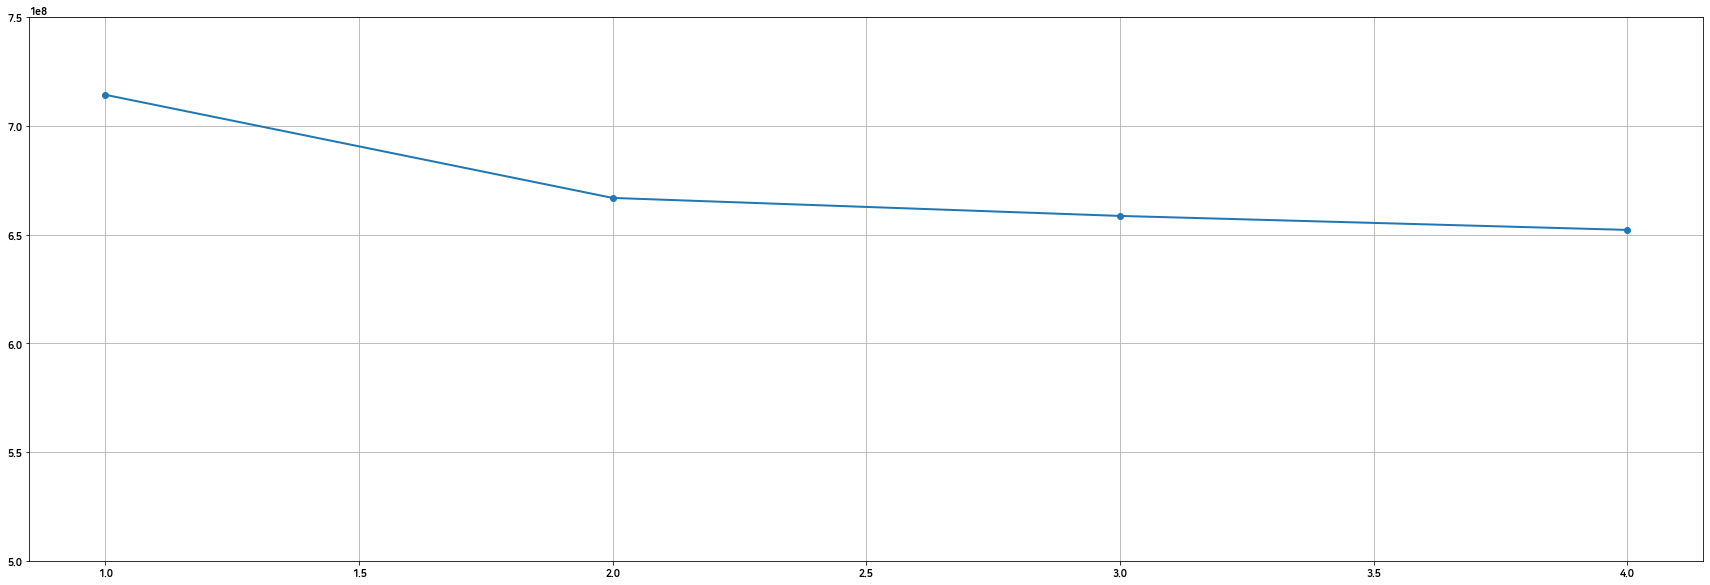

In [29]:

#분기별이용자수
plt.plot(range(1,5), quarter, marker='o', label='이용자수')
plt.ylim([500000000, 750000000])  